In [3]:
import pandas as pd
import numpy as np

data = pd.read_csv('CAD.csv')
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,Male,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,N,Cad
1,67,70,157,Fmale,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,N,Cad
2,54,54,164,Male,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,Cad
3,66,67,158,Fmale,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,Normal
4,50,87,153,Fmale,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,Normal


In [4]:
# Feature engineering to transform Cath column to binary
data['Cath'] = data['Cath'].map({'Cad': 1, 'Normal': 0})
data.head()

# Feature engineering to transform Sex to binary
data['Sex'] = data['Sex'].map({'Male': 1, 'Fmale': 0})
data.head()

# Feature engineering to transform all Y and N features to binary
data = data.replace(to_replace='Y', value=1)
data = data.replace(to_replace='N', value=0)
data.head()

,Age,Weight,Length,Sex,BMI,DM,HTN,Current Smoker,EX-Smoker,FH,...,K,Na,WBC,Lymph,Neut,PLT,EF-TTE,Region RWMA,VHD,Cath
0,53,90,175,1,29.387755,0,1,1,0,0,...,4.7,141,5700,39,52,261,50,0,0,1
1,67,70,157,0,28.398718,0,1,0,0,0,...,4.7,156,7700,38,55,165,40,4,0,1
2,54,54,164,1,20.077335,0,0,1,0,0,...,4.7,139,7400,38,60,230,40,2,mild,1
3,66,67,158,0,26.838648,0,1,0,0,0,...,4.4,142,13000,18,72,742,55,0,Severe,0
4,50,87,153,0,37.165193,0,1,0,0,0,...,4.0,140,9200,55,39,274,50,0,Severe,0


In [5]:
#Remove rows with missing values
data = data.dropna(axis=0)
data.head()
#count missing values in dataset
data.isnull().sum().head()

Age       0
Weight    0
Length    0
Sex       0
BMI       0
dtype: int64

/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


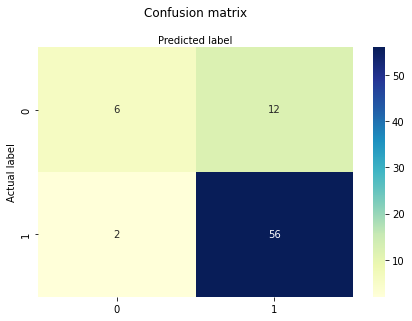

Accuracy: 0.8157894736842105
Precision: 0.8235294117647058
Recall: 0.9655172413793104
F1 score: 0.888888888888889


In [23]:
# make Cath the target variable and obesity,airway disease and thyroid disease the features 
X = data[['Obesity','Airway disease','Thyroid Disease','BP','Sex','Age','BMI','Current Smoker','EX-Smoker']]
y = data['Cath']

# split the data into training and testing sets
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25)

# import the logistic regression model
from sklearn.linear_model import LogisticRegression
logreg = LogisticRegression()

# fit the model with data
logreg.fit(X_train,y_train)

# predict the response for new observations
y_pred = logreg.predict(X_test)

# import the metrics class
from sklearn import metrics
cnf_matrix = metrics.confusion_matrix(y_test,y_pred)
cnf_matrix

# import required modules
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
get_ipython().run_line_magic('matplotlib', 'inline')

# create heatmap
class_names = [0,1]
fig,ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks,class_names)
plt.yticks(tick_marks,class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap='YlGnBu',fmt='g')
ax.xaxis.set_label_position('top')
plt.tight_layout()
plt.title('Confusion matrix',y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

# print accuracy
print("Accuracy:",metrics.accuracy_score(y_test,y_pred))
print("Precision:",metrics.precision_score(y_test,y_pred))
print("Recall:",metrics.recall_score(y_test,y_pred))
#f1 score
print("F1 score:",metrics.f1_score(y_test,y_pred))
